#Project 2 Modeling 
## **TEAM-4 PROJECT 2** 

* Aishwary Bodhale
* Himanshu Dubey
* Karishma Ramchandani
* Nandan Adlakha
* Rachel Kallely
* Sahibpreet Singh

##Let's begin with extracting data from Yahoo
###contd...

In [1]:
# some useful modules
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import *

In [2]:
# some stock-specific packages
!pip install yahoo_fin
!pip install requests_html
import yahoo_fin.stock_info as si

     |████████████████████████████████| 81 kB 3.3 MB/s 
     |████████████████████████████████| 83 kB 2.0 MB/s 
     |████████████████████████████████| 127 kB 54.9 MB/s 
     |████████████████████████████████| 103 kB 24.2 MB/s 
  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-py3-none-any.whl size=13502 sha256=e09ede1218b157e13bb119c2508a3fed40c0b80f0703e385691391c609ea8ef9
  Stored in directory: /root/.cache/pip/wheels/ed/f7/62/50ab6c9a0b5567267ab76a9daa9d06315704209b2c5d032031
  Created wheel for parse: filename=parse-1.19.0-py3-none-any.whl size=24591 sha256=caae7ae48ca2b0980dbc0ef909326649f1b2a004244f2e4ddcb45367116593e1
  Stored in directory: /root/.cache/pip/wheels/9c/aa/cc/f2228050ccb40f22144b073f15a2c84f11204f29fc0dce028e
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6065 sha256=4a983e07c4b80cc095f00cf2b2835e8453dd44c314b0b6e35980d521cde580eb
  Stored in directory: /root/.cache/pip/wheels/73/ad/a4/0dff4a6ef231fc0dfa12ffbac2a36ce

In [3]:
#Testing our recommendation with the latest data available on Yahoo
tickers_list = ['HSY','HOLX','TSCO','AWK','GOOG','AMZN','WCN','BRK-B','ADP','UNH']
# pull historical price data for each stocks to match with our news score later
dow_prices = {ticker : si.get_data(ticker,start_date = '01/01/2015',end_date='03/01/2020',interval='1d') for ticker in tickers_list}

In [4]:
# take a peak!
dow_prices

{'ADP':                   open        high         low  ...    adjclose   volume  ticker
 2015-01-02   82.980003   84.180000   82.519997  ...   71.695160  1866600     ADP
 2015-01-05   83.250000   84.440002   82.949997  ...   71.643524  3270900     ADP
 2015-01-06   83.300003   83.739998   81.959999  ...   71.049599  2569700     ADP
 2015-01-07   82.220001   83.320000   81.800003  ...   71.669342  2079000     ADP
 2015-01-08   83.959999   85.180000   83.639999  ...   73.313461  3358700     ADP
 ...                ...         ...         ...  ...         ...      ...     ...
 2020-02-24  175.779999  177.179993  173.899994  ...  167.964600  2084100     ADP
 2020-02-25  174.649994  175.490005  166.899994  ...  160.881866  2606400     ADP
 2020-02-26  169.000000  170.800003  166.229996  ...  160.063919  2319700     ADP
 2020-02-27  164.059998  165.970001  157.460007  ...  151.595428  2843300     ADP
 2020-02-28  153.410004  159.449997  150.529999  ...  148.910522  4583100     ADP
 
 [1298 

In [5]:
# Now we will extract just the data we need (adjclose)
# get the adjclose price for the HSY (one sample)
prep_data = pd.DataFrame(dow_prices['HSY']['adjclose']).rename(columns = {"adjclose":"HSY"})

# combine all the tickers (all the rest of the samples)
for i in tickers_list[1:]:
  prep_data[i] = pd.DataFrame(dow_prices[i]['adjclose'])
prep_data

,HSY,HOLX,TSCO,AWK,GOOG,AMZN,WCN,BRK-B,ADP,UNH
2015-01-02,88.518471,26.379999,71.547089,47.364574,523.373108,308.519989,28.088425,149.169998,71.695160,90.677467
2015-01-05,87.895378,26.120001,70.080772,46.635746,512.463013,302.190002,27.785244,147.000000,71.643524,89.183876
2015-01-06,88.185577,25.750000,69.008507,46.758678,500.585632,295.290009,27.362055,146.839996,71.049599,89.003944
2015-01-07,89.738983,26.400000,71.244659,47.355785,499.727997,298.420013,27.185198,148.880005,71.669342,89.912682
2015-01-08,91.471634,27.110001,74.158966,47.540176,501.303680,300.459991,27.368372,151.369995,73.313461,94.204529
...,...,...,...,...,...,...,...,...,...,...
2020-02-24,153.972321,51.400002,94.793098,133.491989,1421.589966,2009.290039,100.641014,221.690002,167.964600,270.382019
2020-02-25,152.402954,49.369999,91.540314,130.128510,1388.449951,1972.739990,100.038979,218.050003,160.881866,256.366028
2020-02-26,153.429810,48.540001,89.908981,130.079620,1393.180054,1979.589966,98.748619,216.059998,160.063919,255.986435
2020-02-27,147.210464,47.689999,88.867310,124.936661,1318.089966,1884.300049,94.427681,207.669998,151.595428,247.148590


In [6]:
#We have used 1298 days data here, let's see the number of days we picked the data
prep_data.shape

(1298, 10)

Rather than using the raw time series, let's build a model based on past returns (the difference from the previous day).

In [7]:
# create return features for each ticker, 
# we will just use a pct_change as the return
return_data = pd.DataFrame()
for i in tickers_list:
  return_data[i] = prep_data[i].pct_change()


In [8]:
return_data.shape

(1298, 10)

## Visualize the Time Series

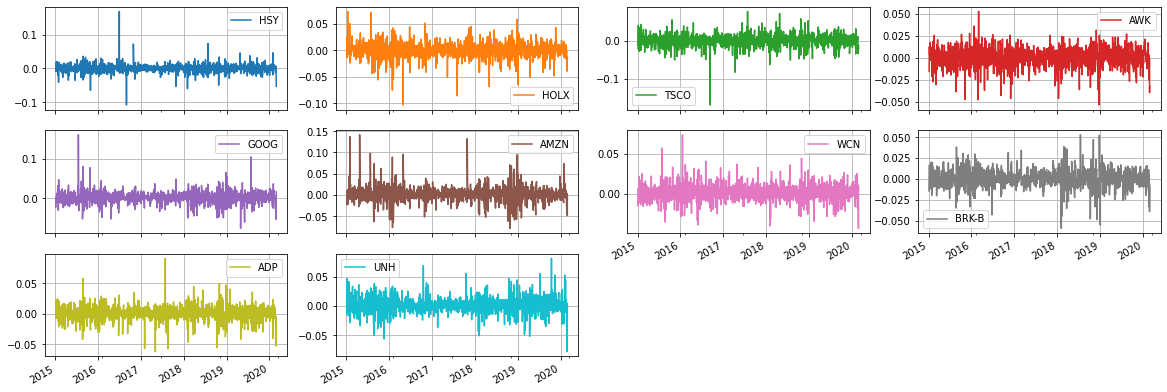

In [9]:
return_data.plot(subplots=True,
        grid=True, 
        layout=(20,4),
         figsize=(20,50))
plt.show()

prep_data.plot(subplots=True,
        grid=True, 
        layout=(20,4),
         figsize=(20,50))
plt.show()

##Plotting Together 



In [10]:
return_data.head()


,HSY,HOLX,TSCO,AWK,GOOG,AMZN,WCN,BRK-B,ADP,UNH
2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,-0.007039,-0.009856,-0.020494,-0.015388,-0.020846,-0.020517,-0.010794,-0.014547,-0.000720,-0.016471
2015-01-06,0.003302,-0.014165,-0.015300,0.002636,-0.023177,-0.022833,-0.015231,-0.001088,-0.008290,-0.002018
2015-01-07,0.017615,0.025243,0.032404,0.012770,-0.001713,0.010600,-0.006464,0.013893,0.008723,0.010210
2015-01-08,0.019308,0.026894,0.040906,0.003894,0.003153,0.006836,0.006738,0.016725,0.022940,0.047734


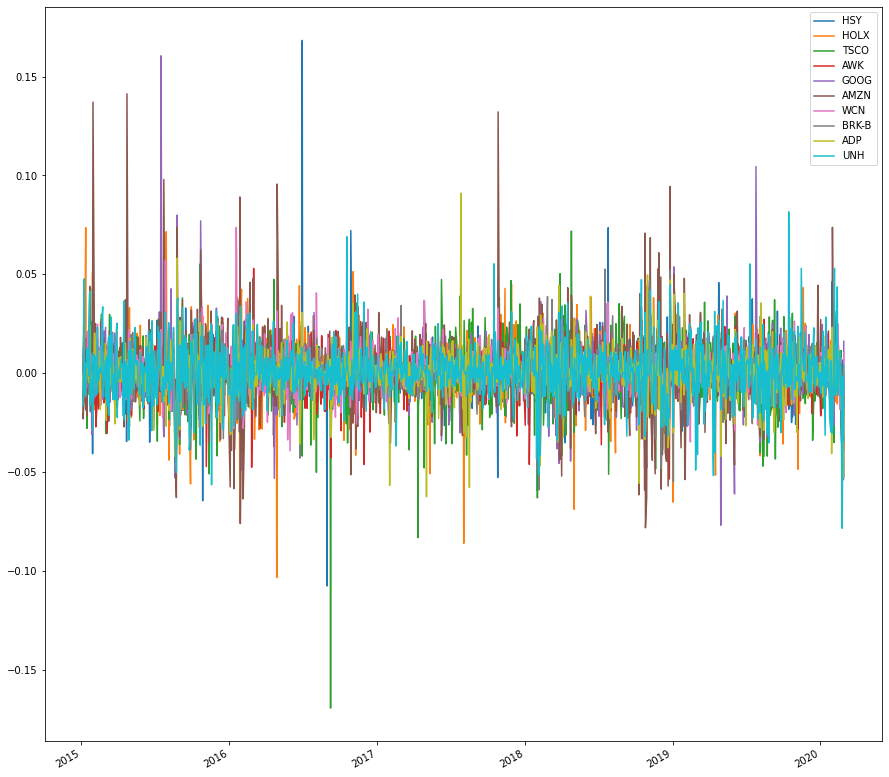

In [11]:
# see what it looks like... messy... some volatility here!
return_data.plot(layout=(3,4),
         figsize=(15,15))

plt.show()

There is a lot of noise here but we can observe outliers here, like HSY, AMZN and GOOG. Let's observe a plot based on the adjclose.

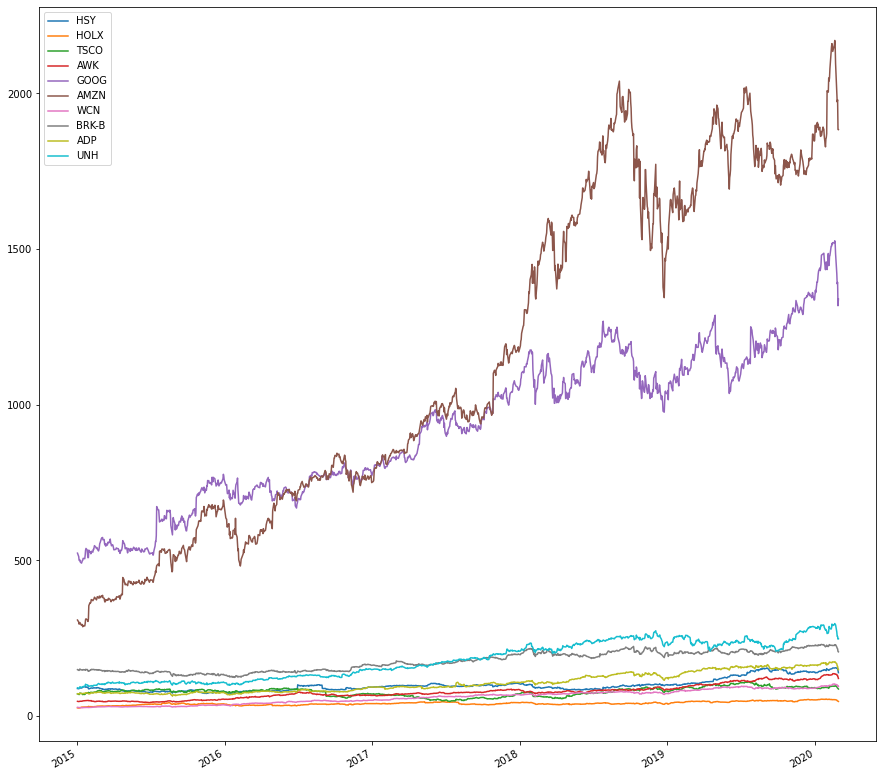

In [12]:
prep_data.plot(layout=(3,4),
         figsize=(15,15))

plt.show()

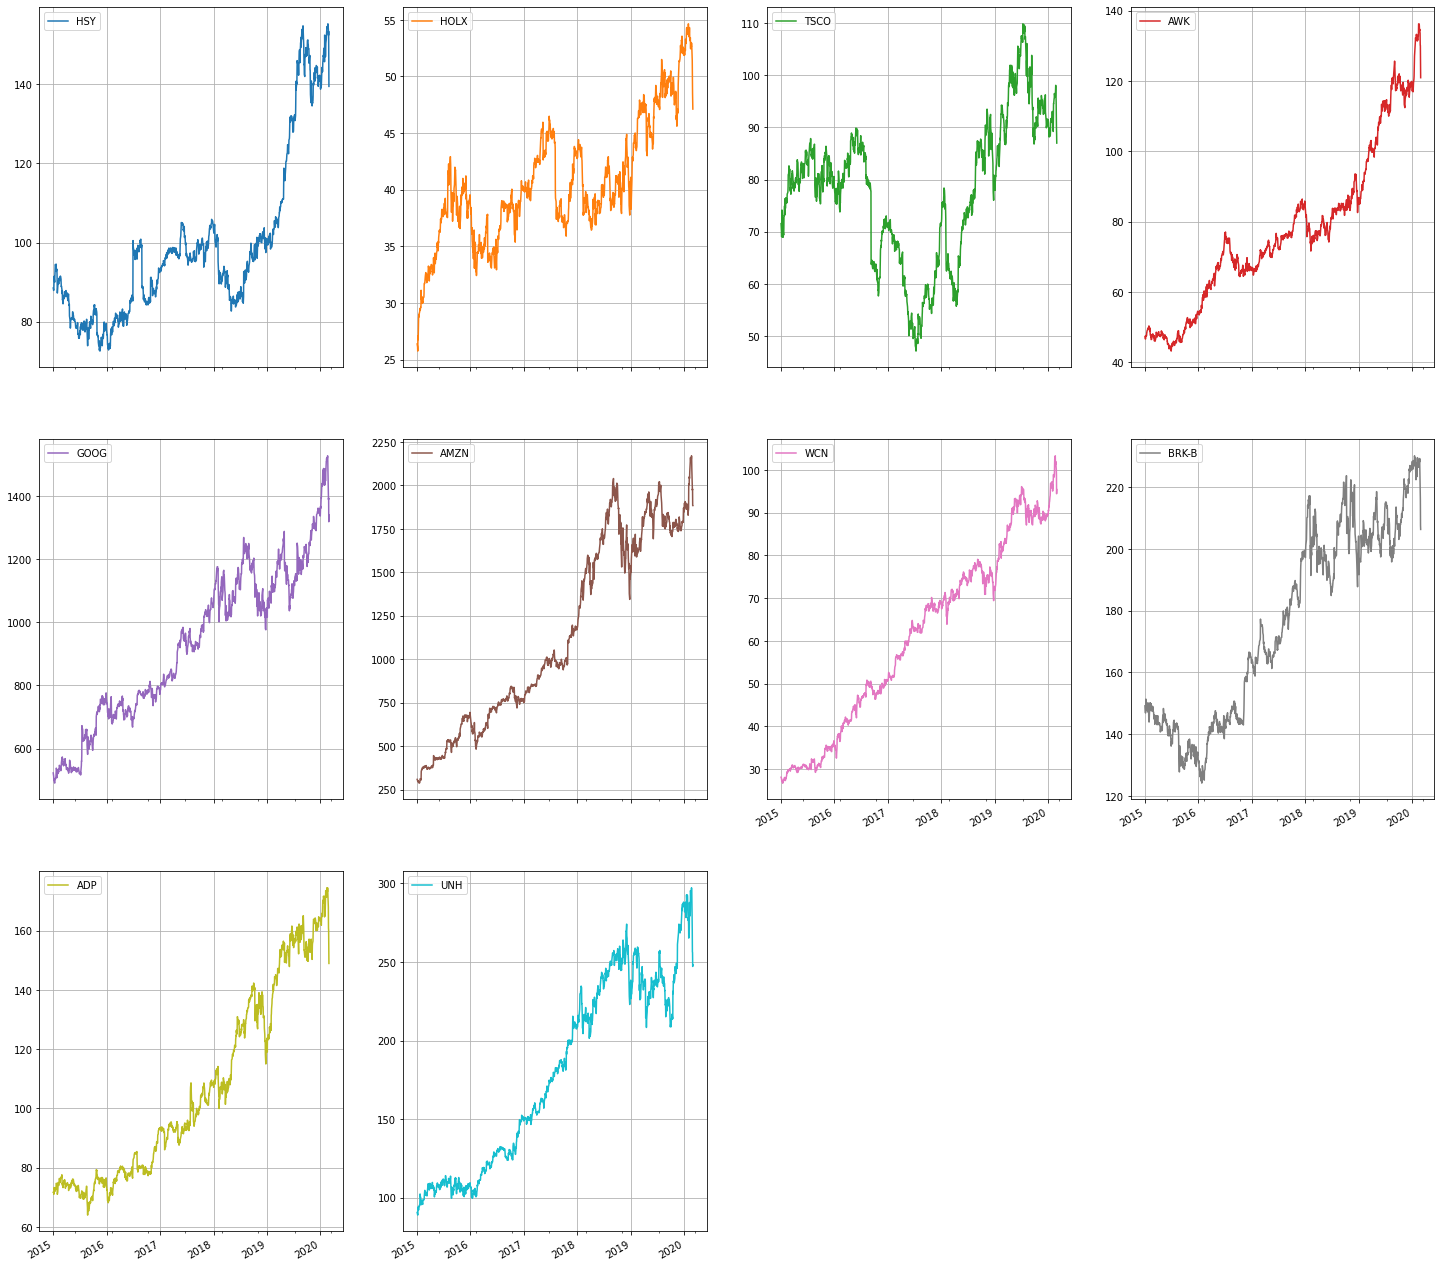

In [13]:
#Visualizing Individually
prep_data.plot(subplots=True,
        grid=True, 
        layout=(3,4),
         figsize=(25,25))
plt.show()

Here we can see AMZN, GOOG, UNH, BRK-B  shows a positive trend upward.

In [14]:
#Checking the average return and average standard deviation

Avg_Return = pd.DataFrame(np.mean(return_data) ,columns=["Avg_Return"])
print(Avg_Return)
Std_Dev_Return = pd.DataFrame(np.std(return_data) ,columns=["Std_Dev_Return"])
print(Std_Dev_Return)

#We will use this information for our stock allocation ahead as it is a vital information to consider while choosing stocks. 

       Avg_Return
HSY      0.000428
HOLX     0.000556
TSCO     0.000288
AWK      0.000780
GOOG     0.000839
AMZN     0.001564
WCN      0.000999
BRK-B    0.000305
ADP      0.000640
UNH      0.000876
       Std_Dev_Return
HSY          0.012520
HOLX         0.014656
TSCO         0.016474
AWK          0.010709
GOOG         0.015188
AMZN         0.018445
WCN          0.010582
BRK-B        0.010480
ADP          0.012370
UNH          0.014129


AMZN, GOOG, UNH, and WCN has the highest average return even though some of them have comparitively higher standard deviations.

>We will use this information for our stock allocation ahead as it is a vital information to consider while choosing stocks. 

## Covariance and Correlation Matrix

In [15]:
Covariance_matrix = return_data.cov()
Covariance_matrix

,HSY,HOLX,TSCO,AWK,GOOG,AMZN,WCN,BRK-B,ADP,UNH
HSY,0.000157,0.000032,0.000035,0.000055,0.000033,0.000027,0.000035,0.000032,0.000050,0.000033
HOLX,0.000032,0.000215,0.000071,0.000034,0.000074,0.000086,0.000041,0.000057,0.000068,0.000083
TSCO,0.000035,0.000071,0.000272,0.000021,0.000070,0.000080,0.000043,0.000070,0.000084,0.000067
AWK,0.000055,0.000034,0.000021,0.000115,0.000024,0.000029,0.000036,0.000025,0.000038,0.000029
GOOG,0.000033,0.000074,0.000070,0.000024,0.000231,0.000178,0.000054,0.000074,0.000090,0.000082
AMZN,0.000027,0.000086,0.000080,0.000029,0.000178,0.000340,0.000056,0.000073,0.000092,0.000086
WCN,0.000035,0.000041,0.000043,0.000036,0.000054,0.000056,0.000112,0.000047,0.000059,0.000049
BRK-B,0.000032,0.000057,0.000070,0.000025,0.000074,0.000073,0.000047,0.000110,0.000074,0.000068
ADP,0.000050,0.000068,0.000084,0.000038,0.000090,0.000092,0.000059,0.000074,0.000153,0.000072
UNH,0.000033,0.000083,0.000067,0.000029,0.000082,0.000086,0.000049,0.000068,0.000072,0.000200


In [16]:
Corr_matrix = return_data.corr()
Corr_matrix

,HSY,HOLX,TSCO,AWK,GOOG,AMZN,WCN,BRK-B,ADP,UNH
HSY,1.000000,0.171752,0.170715,0.409251,0.171220,0.116968,0.261341,0.240813,0.321560,0.185916
HOLX,0.171752,1.000000,0.292366,0.215980,0.332931,0.319714,0.262813,0.373696,0.377038,0.398814
TSCO,0.170715,0.292366,1.000000,0.118603,0.280592,0.262805,0.247478,0.406396,0.409778,0.285591
AWK,0.409251,0.215980,0.118603,1.000000,0.148715,0.146999,0.315248,0.224308,0.289745,0.193813
GOOG,0.171220,0.332931,0.280592,0.148715,1.000000,0.634120,0.334158,0.466521,0.480738,0.379858
AMZN,0.116968,0.319714,0.262805,0.146999,0.634120,1.000000,0.287239,0.378115,0.403357,0.327839
WCN,0.261341,0.262813,0.247478,0.315248,0.334158,0.287239,1.000000,0.422780,0.453287,0.324949
BRK-B,0.240813,0.373696,0.406396,0.224308,0.466521,0.378115,0.422780,1.000000,0.572237,0.457605
ADP,0.321560,0.377038,0.409778,0.289745,0.480738,0.403357,0.453287,0.572237,1.000000,0.411575
UNH,0.185916,0.398814,0.285591,0.193813,0.379858,0.327839,0.324949,0.457605,0.411575,1.000000


A way that we can balance our portfolio is to look at how different stocks vary with each other. 

Covariance is related to correlation - but is not the same thing. Covariance is a numeric representation of how much things vary together. Correlation is covariance divided by standard devation.

A positive covariance means asset prices are moving in the same general direction.A negative covariance means asset prices are moving in opposite directions.

Investors using modern portfolio theory (MPT) seek to optimize returns by including assets in their portfolio that have a negative covariance.
Covariance helps investors create a portfolio that includes a mix of distinct asset types, thus employing a diversification strategy to reduce risk.

>Correlation and covariance are again important factors to consider while allocating our stocks. There isn't any negative correlation and covariance among our selected stocks. Therefore we will be choosing stocks in which there isn't any negative covariance which means there is a high risk involved for these stocks.

#Building Non Linear Optimization Model


First, we specify the ConcreteModel. Then we specify our decision variables and BOUND THEM (between 0 and 1) - this is very important for a nonlinear solver so it doesn't go down the rabbit hole!

In [17]:
# creating covariance table on stock return dataframe
df_cov = return_data.cov()
print('Covariance Matrix:')
print(df_cov)
print('\n') # return/blank line

# create the average of each stock
# these are the objective function COEFFICIENTS!
df_return = return_data.mean()
print('Average Return:')
print(df_return)

Covariance Matrix:
            HSY      HOLX      TSCO  ...     BRK-B       ADP       UNH
HSY    0.000157  0.000032  0.000035  ...  0.000032  0.000050  0.000033
HOLX   0.000032  0.000215  0.000071  ...  0.000057  0.000068  0.000083
TSCO   0.000035  0.000071  0.000272  ...  0.000070  0.000084  0.000067
AWK    0.000055  0.000034  0.000021  ...  0.000025  0.000038  0.000029
GOOG   0.000033  0.000074  0.000070  ...  0.000074  0.000090  0.000082
AMZN   0.000027  0.000086  0.000080  ...  0.000073  0.000092  0.000086
WCN    0.000035  0.000041  0.000043  ...  0.000047  0.000059  0.000049
BRK-B  0.000032  0.000057  0.000070  ...  0.000110  0.000074  0.000068
ADP    0.000050  0.000068  0.000084  ...  0.000074  0.000153  0.000072
UNH    0.000033  0.000083  0.000067  ...  0.000068  0.000072  0.000200

[10 rows x 10 columns]


Average Return:
HSY      0.000428
HOLX     0.000556
TSCO     0.000288
AWK      0.000780
GOOG     0.000839
AMZN     0.001564
WCN      0.000999
BRK-B    0.000305
ADP      0.000

In [18]:
# install pyomo
!pip install -q pyomo
from pyomo.environ import *

try:
    import google.colab
    try:
        from pyomo.environ import *
    except:
        !pip install -q pyomo
    if not 'ipopt_executable' in vars():
        !wget -N -q "https://ampl.com/dl/open/ipopt/ipopt-linux64.zip"
        !unzip -o -q ipopt-linux64
        ipopt_executable = '/content/ipopt' # THIS IS NEW! We are using the IPOPT Solver.
except:
    pass

     |████████████████████████████████| 9.1 MB 5.1 MB/s 
     |████████████████████████████████| 49 kB 5.2 MB/s 


In [19]:
from pyomo.environ import *
m = ConcreteModel()

# defining variables
# each one is a stock (HSY, HOLX, TSCO, AWK, GOOG, AMZN, WCN, BRK-B, ADP, UNH)
m.HSY = Var(within=NonNegativeReals, bounds=(0,1))
m.HOLX = Var(within=NonNegativeReals, bounds=(0,1))
m.TSCO = Var(within=NonNegativeReals, bounds=(0,1))
m.AWK = Var(within=NonNegativeReals, bounds=(0,1))
m.GOOG = Var(within=NonNegativeReals, bounds=(0,1))
m.AMZN = Var(within=NonNegativeReals, bounds=(0,1))
m.WCN = Var(within=NonNegativeReals, bounds=(0,1))
m.BRKB = Var(within=NonNegativeReals, bounds=(0,1))
m.ADP = Var(within=NonNegativeReals, bounds=(0,1))
m.UNH = Var(within=NonNegativeReals, bounds=(0,1))

Now we specify the objective function; maximize your returns - make as much money as possible! Note how we are specifying the fraction/proportion we are investing in each stock multiplied by its average return.

We also specify three constriants.

The amount you invest in your portfolio needs to sum to '1' or 100%... you must invest all of your money, regardless of how much money you start with (100K or 100M)

The risk must be below a certain level (your 'risk ceiling'). We will start with 0.0015 (so that we are more likely to make money at low risk.If the risk is high, we will just dump all the money in one stock - the one that makes the most money on average, but may have high volatility!) RISK for our definition, is simply the covariance matrix TIMES the 'proportion invested'. The 'proportion invested' is the allocation amount - your decision variable. So, there is a relationship between the risk and the allocation in different stocks.
We will iteratively try to identify which mix of stocks gives us the max return for a given risk level. As the investor, we can choose which risk level makes sense for us - and we can be confident that we are optimally allocating your portfolio for that given risk level.

In [20]:
# declare objective
m.objective = Objective(expr =               
                        m.HSY*df_return[0] + 
                        m.HOLX*df_return[1] + 
                        m.TSCO*df_return[2] +
                        m.AWK*df_return[3] + 
                        m.GOOG*df_return[4] +
                        m.AMZN*df_return[5] +
                        m.WCN*df_return[6] +
                        m.BRKB*df_return[7] +
                        m.ADP*df_return[8] +
                        m.UNH*df_return[9],
                        sense=maximize) # yes, we want to MAX our returns!


# declare constraints
# 1. Sum of all porportions = 1
m.sum_proportions = Constraint(expr = m.HSY + m.HOLX + m.TSCO + m.AWK + m.GOOG + m.AMZN + m.WCN + m.BRKB +m.ADP + m.UNH == 1)

# 2. Minimum return should be 0.015 or 1.5%
#m.return_floor = Constraint(expr = m.objective >= 0.015)

# 3. Set maximum risk
m.total_risk = Constraint(expr = m.HSY + m.HOLX + m.TSCO + m.AWK + m.GOOG + m.AMZN + m.WCN + m.BRKB +m.ADP + m.UNH >= 0.0)

Risk is just Prop(A)*Prop(B)*Cov(A,B).

It's a square matrix, just like covariance.

Risk = the sum of all values in this intermediate matrix.

In [21]:
# creating calculations table for calculate the risk
# 3. Max risk should be less than 0.0015
max_risk = 0.0015 #PLAY WITH THIS VALUE
def calc_risk():
  # this is a list of all of your investment allocations (proportion invested in each stock)
  # this is UPDATED as the model is cranking - see how we are referncing the decision variables?
  proportions = [ m.HSY, m.HOLX, m.TSCO, m.AWK, m.GOOG, m.AMZN, m.WCN, m.BRKB, m.ADP, m.UNH]
  risk_matrix = [] # an empty list
  
  # now we iterate across the covariance matrix
  # 'risk elements' are = cov(A,B)*prop(A)*prop(B)
  # since there are 10 stocks, there are 10*10 = 100 elements
  # sum these 100 elements up at the end! that's the risk.
  # We just need the index, but df_cov.columns gives a list of pairs, so we need to get col as well
  for index, col in enumerate(df_cov.columns):
    i = 0
    risk = []
    for row in df_cov[col]:
      risk.append(proportions[index]*row*proportions[i])
      i = i + 1
    risk_matrix.append(risk)
  risk_matrix = pd.DataFrame(risk_matrix)
  return risk_matrix.sum().sum() 

# We are going to use this expression to compute the risk
expr_risk = calc_risk()

# Sequence of risk levels
risk_limits = np.arange(0.00002, 0.0005, 0.000005) # take tiny steps
#risk_limits = np.arange(0.001, 0.015, 0.00005) # take tiny steps
risk_limits

array([2.00e-05, 2.50e-05, 3.00e-05, 3.50e-05, 4.00e-05, 4.50e-05,
       5.00e-05, 5.50e-05, 6.00e-05, 6.50e-05, 7.00e-05, 7.50e-05,
       8.00e-05, 8.50e-05, 9.00e-05, 9.50e-05, 1.00e-04, 1.05e-04,
       1.10e-04, 1.15e-04, 1.20e-04, 1.25e-04, 1.30e-04, 1.35e-04,
       1.40e-04, 1.45e-04, 1.50e-04, 1.55e-04, 1.60e-04, 1.65e-04,
       1.70e-04, 1.75e-04, 1.80e-04, 1.85e-04, 1.90e-04, 1.95e-04,
       2.00e-04, 2.05e-04, 2.10e-04, 2.15e-04, 2.20e-04, 2.25e-04,
       2.30e-04, 2.35e-04, 2.40e-04, 2.45e-04, 2.50e-04, 2.55e-04,
       2.60e-04, 2.65e-04, 2.70e-04, 2.75e-04, 2.80e-04, 2.85e-04,
       2.90e-04, 2.95e-04, 3.00e-04, 3.05e-04, 3.10e-04, 3.15e-04,
       3.20e-04, 3.25e-04, 3.30e-04, 3.35e-04, 3.40e-04, 3.45e-04,
       3.50e-04, 3.55e-04, 3.60e-04, 3.65e-04, 3.70e-04, 3.75e-04,
       3.80e-04, 3.85e-04, 3.90e-04, 3.95e-04, 4.00e-04, 4.05e-04,
       4.10e-04, 4.15e-04, 4.20e-04, 4.25e-04, 4.30e-04, 4.35e-04,
       4.40e-04, 4.45e-04, 4.50e-04, 4.55e-04, 4.60e-04, 4.65e

## Running the model
Now it's time to run the model!

In [22]:
# updating risk contraint for each limit and then solving the problem
param_analysis = {} # key=risk, value =stock allocations 
returns = {} # key=risk, value = return
for r in risk_limits:
  # WE REMOVE AND RECALCULATE THE RISK IN EACH ITERATION
  m.del_component(m.total_risk)
  m.total_risk = Constraint(expr = expr_risk <= r)
  # run solver
  result = SolverFactory('ipopt', executable=ipopt_executable).solve(m).write()
  # store our allocation proportions
  param_analysis[r] = [m.HSY(), m.HOLX(), m.TSCO(), m.AWK(), m.GOOG(), m.AMZN(), m.WCN(), m.BRKB(), m.ADP(), m.UNH()]
  # store our returns
  returns[r] = m.HSY()*df_return[0] + m.HOLX()*df_return[1] + m.TSCO()*df_return[2] + m.AWK()*df_return[3] + m.GOOG()*df_return[4] + m.AMZN()*df_return[5] + m.WCN()*df_return[6] + m.BRKB()*df_return[7] + m.ADP()*df_return[8] + m.UNH()*df_return[9]


    model.name="unknown";
      - termination condition: infeasible
      - message from solver: Ipopt 3.12.13\x3a Converged to a locally
        infeasible point. Problem may be infeasible.
# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 10
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time

## Infeasible solutions

Some of our runs may not be feasible, so we want to filter out those cases.

In [23]:
from pyomo.opt import SolverStatus, TerminationCondition

# updating risk contraint for each limit and then solving the problem
param_analysis = {} # key=risk, value =stock allocations 
returns = {} # key=risk, value = return
for r in risk_limits:
  # Remove constraint to avoid error messages
  m.del_component(m.total_risk)
  m.total_risk = Constraint(expr = expr_risk <= r)
  # run solver
  result = SolverFactory('ipopt', executable=ipopt_executable).solve(m)

  # If solution is not feasible, ignore this run
  if result.solver.termination_condition == TerminationCondition.infeasible:
    continue

  result = result.write()

  # store our allocation proportions
  param_analysis[r] = [m.HSY(), m.HOLX(), m.TSCO(), m.AWK(), m.GOOG(), m.AMZN(), m.WCN(), m.BRKB(), m.ADP(), m.UNH()]
  # store our returns
  returns[r] =  m.HSY()*df_return[0] + m.HOLX()*df_return[1] + m.TSCO()*df_return[2] + m.AWK()*df_return[3] + m.GOOG()*df_return[4] + m.AMZN()*df_return[5] + m.WCN()*df_return[6] + m.BRKB()*df_return[7] + m.ADP()*df_return[8] + m.UNH()*df_return[9]


    model.name="unknown";
      - termination condition: infeasible
      - message from solver: Ipopt 3.12.13\x3a Converged to a locally
        infeasible point. Problem may be infeasible.
    model.name="unknown";
      - termination condition: infeasible
      - message from solver: Ipopt 3.12.13\x3a Converged to a locally
        infeasible point. Problem may be infeasible.
    model.name="unknown";
      - termination condition: infeasible
      - message from solver: Ipopt 3.12.13\x3a Converged to a locally
        infeasible point. Problem may be infeasible.
    model.name="unknown";
      - termination condition: infeasible
      - message from solver: Ipopt 3.12.13\x3a Converged to a locally
        infeasible point. Problem may be infeasible.
    model.name="unknown";
      - termination condition: infeasible
      - message from solver: Ipopt 3.12.13\x3a Converged to a locally
        infeasible point. Problem may be infeasible.
    model.name="unknown";
      - termination

In [24]:
#Checking the average return and average standard deviation on the 10 stocks

Avg_Return = pd.DataFrame(np.mean(return_data) ,columns=["Avg_Return"])
print(Avg_Return)
Std_Dev_Return = pd.DataFrame(np.std(return_data) ,columns=["Std_Dev_Return"])
print(Std_Dev_Return)

       Avg_Return
HSY      0.000428
HOLX     0.000556
TSCO     0.000288
AWK      0.000780
GOOG     0.000839
AMZN     0.001564
WCN      0.000999
BRK-B    0.000305
ADP      0.000640
UNH      0.000876
       Std_Dev_Return
HSY          0.012520
HOLX         0.014656
TSCO         0.016474
AWK          0.010709
GOOG         0.015188
AMZN         0.018445
WCN          0.010582
BRK-B        0.010480
ADP          0.012370
UNH          0.014129


AMZN, GOOG, UNH, and WCN has the highest average return even though some of them have comparitively higher standard deviations.

## Parameter Analysis
Let's see what the efficient frontier looks like, and the allocation!

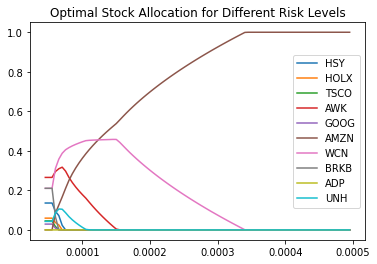

In [25]:
# generating the dataframe for proportions of the portfolio for each risk limit
param_analysis = pd.DataFrame.from_dict(param_analysis, orient='index')
param_analysis.columns = ['HSY', 'HOLX', 'TSCO', 'AWK', 'GOOG', 'AMZN', 'WCN', 'BRKB', 'ADP', 'UNH']
param_analysis.plot()
plt.title('Optimal Stock Allocation for Different Risk Levels')
plt.show()

##Efficient Frontier (modeling)

In [26]:
# subset
risk = list(returns.keys()) # coerce dict_keys to a list
print(risk)
reward = list(returns.values()) # coerce dict_values to a list
print(reward) # we aren't allowed to name our value 'return' - this is a reserved name.

[4.4999999999999996e-05, 5.4999999999999995e-05, 5.9999999999999995e-05, 6.5e-05, 7e-05, 7.5e-05, 7.999999999999999e-05, 8.499999999999999e-05, 8.999999999999999e-05, 9.499999999999999e-05, 9.999999999999999e-05, 0.00010499999999999999, 0.00010999999999999999, 0.00011499999999999999, 0.00011999999999999999, 0.000125, 0.00013, 0.000135, 0.00014, 0.000145, 0.00015, 0.00015499999999999997, 0.00015999999999999999, 0.000165, 0.00016999999999999999, 0.00017499999999999997, 0.00017999999999999998, 0.000185, 0.00018999999999999998, 0.00019499999999999997, 0.00019999999999999998, 0.000205, 0.00020999999999999998, 0.00021499999999999997, 0.00021999999999999998, 0.000225, 0.00022999999999999998, 0.00023499999999999997, 0.00023999999999999998, 0.000245, 0.00025, 0.00025499999999999996, 0.00026, 0.000265, 0.00027, 0.00027499999999999996, 0.00028, 0.000285, 0.00028999999999999995, 0.00029499999999999996, 0.0003, 0.000305, 0.00031, 0.00031499999999999996, 0.00031999999999999997, 0.000325, 0.000329999

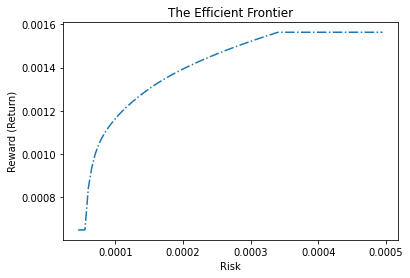

In [27]:
# plot! pylab makes it easy
from pylab import *
plot(risk, reward, '-.')
title('The Efficient Frontier')
xlabel('Risk')
ylabel('Reward (Return)')
plt.show()

##Portfolio Allocation 
Observing the Efficient Frontier graph, our team came up with an investment plan for the investors to invest in stocks so that they could get a 0.13%(approx) Return at a 0.015% (approx) Risk level. Based on the Optimal Stock Allocation graph, we are choosing two stocks AMZN(Amazon) and WCN(Waste Connections Inc) at 0.05% risk level. We are choosing a third stock GOOG(Google) because even though it doesn't show any significant increase on the allocation plot, its stock history has a reputaion of increase in the past. Our decision with these three stocks becomes even more solid when we observe the average return calculated above as these three stocks had the maximum return. There wasn't any negative covariance between our chosen stocks so we decided to choose the stocks that were trending upward at the mentioned risk level(0.015%). This seems an optimum level to select as we can have a diversified portfolio with these three stocks. The proportion we chose to invest in each stock varies with how strong the trend looks i.e. 50% in AMZN because clearly it is the best performing stock so far, 30% in WCN because even though it has a sharp drop at a higher risk level but it shows a promising trend at lower risk, lastly we decided to invest least amount of 20% in the GOOG as it has the weakest trend out of the three. Because we are willing to take the risk with the GOOG, therefore we have allocated minimum stock amount in it. 

#Testing
Testing our recommendation with the latest available stocks available on Yahoo, let's see how our allocation recommendation turns out! In this section we will repeat the same steps we did in modeling but this time we will test our results with the current information of 2021.

In [28]:
#Testing our recommendation with the latest data available on Yahoo
tickers_list = ['HSY','HOLX','TSCO','AWK','GOOG','AMZN','WCN','BRK-B','ADP','UNH']
#we are choosing the latest time span i.e.Jan 1, 2021-October 1, 2021
# pull historical price data for each stocks to match with our news score later
dow_prices = {ticker : si.get_data(ticker,start_date = '01/01/2021',end_date='10/01/2021',interval='1d') for ticker in tickers_list}

In [29]:
# take a peak!
dow_prices

{'ADP':                   open        high         low  ...    adjclose   volume  ticker
 2021-01-04  175.970001  176.570007  167.729996  ...  166.549637  2266700     ADP
 2021-01-05  168.679993  170.179993  167.369995  ...  166.086349  1491600     ADP
 2021-01-06  166.130005  169.440002  166.029999  ...  165.504761  1646100     ADP
 2021-01-07  168.059998  169.949997  167.440002  ...  166.441223  1596700     ADP
 2021-01-08  168.970001  172.380005  168.309998  ...  168.609818  2638700     ADP
 ...                ...         ...         ...  ...         ...      ...     ...
 2021-09-24  200.949997  202.889999  200.720001  ...  202.220001   884100     ADP
 2021-09-27  201.389999  203.169998  201.130005  ...  201.720001  1357500     ADP
 2021-09-28  199.789993  200.509995  196.779999  ...  197.279999  1245900     ADP
 2021-09-29  198.009995  200.699997  197.880005  ...  199.580002  1001500     ADP
 2021-09-30  200.470001  204.339996  199.710007  ...  199.919998  1739700     ADP
 
 [188 r

In [30]:
# let's extract just the data we need (adjclose)
# get the adjclose price for the MMM (one sample)
prep_data = pd.DataFrame(dow_prices['HSY']['adjclose']).rename(columns = {"adjclose":"HSY"})

# combine all the tickers (all the rest of the samples)
for i in tickers_list[1:]:
  prep_data[i] = pd.DataFrame(dow_prices[i]['adjclose'])
prep_data

,HSY,HOLX,TSCO,AWK,GOOG,AMZN,WCN,BRK-B,ADP,UNH
2021-01-04,148.647736,73.120003,138.522995,148.638382,1728.239990,3186.629883,100.651115,228.449997,166.549637,345.778137
2021-01-05,148.480255,76.019997,139.494675,149.479294,1740.920044,3218.510010,101.168343,227.470001,166.086349,341.128174
2021-01-06,149.002365,78.029999,144.630661,150.735764,1735.290039,3138.379883,102.620567,230.270004,165.504761,355.444122
2021-01-07,148.913696,77.970001,145.870041,150.508224,1787.250000,3162.159912,103.446144,232.880005,166.441223,361.142761
2021-01-08,149.760864,80.489998,148.041443,155.306503,1807.209961,3182.699951,104.779015,234.029999,168.609818,359.520264
...,...,...,...,...,...,...,...,...,...,...
2021-09-24,174.039993,76.480003,210.720001,176.789993,2852.659912,3425.520020,132.309998,277.869995,202.220001,407.079987
2021-09-27,170.899994,74.029999,210.309998,170.710007,2830.020020,3405.800049,129.020004,279.720001,201.720001,405.269989
2021-09-28,168.679993,72.870003,207.029999,168.190002,2723.679932,3315.959961,126.860001,276.790009,197.279999,398.619995
2021-09-29,171.899994,73.989998,208.139999,170.300003,2690.419922,3301.120117,126.519997,277.290009,199.580002,400.410004


In [31]:
#We have used 188 days data here, let's see the number of days we picked the data
prep_data.shape

(188, 10)

Rather than use the raw time series, let's build a model based on past returns (the difference from the previous day).

In [32]:
# create return features for each ticker, 
# we will just use a pct_change as the return
return_data = pd.DataFrame()
for i in tickers_list:
  return_data[i] = prep_data[i].pct_change()


In [33]:
#There is about 188 days of stock data available
return_data.shape

(188, 10)

In [34]:
#Observing how our data looks like
return_data.head()


,HSY,HOLX,TSCO,AWK,GOOG,AMZN,WCN,BRK-B,ADP,UNH
2021-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-05,-0.001127,0.039661,0.007015,0.005657,0.007337,0.010004,0.005139,-0.004290,-0.002782,-0.013448
2021-01-06,0.003516,0.026440,0.036819,0.008406,-0.003234,-0.024897,0.014355,0.012309,-0.003502,0.041966
2021-01-07,-0.000595,-0.000769,0.008569,-0.001510,0.029943,0.007577,0.008045,0.011335,0.005658,0.016032
2021-01-08,0.005689,0.032320,0.014886,0.031881,0.011168,0.006496,0.012885,0.004938,0.013029,-0.004493


###Now it's time to run the model again for analysis!


In [35]:
# creating covariance table on stock return dataframe
df_cov = return_data.cov()
print('Covariance Matrix:')
print(df_cov)
print('\n') # return/blank line

# create the average of each stock
# these are the objective function COEFFICIENTS!
df_return = return_data.mean()
print('Average Return:')
print(df_return)

Covariance Matrix:
            HSY      HOLX      TSCO  ...     BRK-B       ADP       UNH
HSY    0.000084  0.000014  0.000033  ...  0.000037  0.000051  0.000051
HOLX   0.000014  0.000319  0.000014  ...  0.000015  0.000056  0.000020
TSCO   0.000033  0.000014  0.000273  ...  0.000054  0.000057  0.000032
AWK    0.000051  0.000091  0.000041  ...  0.000009  0.000039  0.000038
GOOG   0.000027  0.000060  0.000037  ...  0.000038  0.000030  0.000036
AMZN   0.000008  0.000075  0.000015  ...  0.000010  0.000024  0.000001
WCN    0.000044  0.000027  0.000045  ...  0.000037  0.000046  0.000044
BRK-B  0.000037  0.000015  0.000054  ...  0.000097  0.000053  0.000050
ADP    0.000051  0.000056  0.000057  ...  0.000053  0.000141  0.000046
UNH    0.000051  0.000020  0.000032  ...  0.000050  0.000046  0.000138

[10 rows x 10 columns]


Average Return:
HSY      0.000736
HOLX     0.000211
TSCO     0.002171
AWK      0.000778
GOOG     0.002431
AMZN     0.000274
WCN      0.001237
BRK-B    0.001000
ADP      0.001

In [36]:
# install pyomo
!pip install -q pyomo
from pyomo.environ import *

try:
    import google.colab
    try:
        from pyomo.environ import *
    except:
        !pip install -q pyomo
    if not 'ipopt_executable' in vars():
        !wget -N -q "https://ampl.com/dl/open/ipopt/ipopt-linux64.zip"
        !unzip -o -q ipopt-linux64
        ipopt_executable = '/content/ipopt' # THIS IS NEW! We are using the IPOPT Solver.
except:
    pass

In [37]:
from pyomo.environ import *
m = ConcreteModel()

# defining variables
# each one is a stock (MMM, HSY, AYI, RHT.V, ENB, HOLX, SRCL, AWK, TSCO, AXP)
m.HSY = Var(within=NonNegativeReals, bounds=(0,1))
m.HOLX = Var(within=NonNegativeReals, bounds=(0,1))
m.TSCO = Var(within=NonNegativeReals, bounds=(0,1))
m.AWK = Var(within=NonNegativeReals, bounds=(0,1))
m.GOOG = Var(within=NonNegativeReals, bounds=(0,1))
m.AMZN = Var(within=NonNegativeReals, bounds=(0,1))
m.WCN = Var(within=NonNegativeReals, bounds=(0,1))
m.BRKB = Var(within=NonNegativeReals, bounds=(0,1))
m.ADP = Var(within=NonNegativeReals, bounds=(0,1))
m.UNH = Var(within=NonNegativeReals, bounds=(0,1))

In [38]:
# declare objective
m.objective = Objective(expr =               
                        m.HSY*df_return[0] + 
                        m.HOLX*df_return[1] + 
                        m.TSCO*df_return[2] +
                        m.AWK*df_return[3] + 
                        m.GOOG*df_return[4] +
                        m.AMZN*df_return[5] +
                        m.WCN*df_return[6] +
                        m.BRKB*df_return[7] +
                        m.ADP*df_return[8] +
                        m.UNH*df_return[9],
                        sense=maximize) # yes, we want to MAX our returns!


# declare constraints
# 1. Sum of all porportions = 1
m.sum_proportions = Constraint(expr = m.HSY + m.HOLX + m.TSCO + m.AWK + m.GOOG + m.AMZN + m.WCN + m.BRKB +m.ADP + m.UNH == 1)

# 2. Minimum return should be 0.015 or 1.5%
#m.return_floor = Constraint(expr = m.objective >= 0.015)

# 3. Set maximum risk
m.total_risk = Constraint(expr = m.HSY + m.HOLX + m.TSCO + m.AWK + m.GOOG + m.AMZN + m.WCN + m.BRKB +m.ADP + m.UNH >= 0.0)

Risk is just Prop(A)*Prop(B)*Cov(A,B).

It's a square matrix, just like covariance.

Risk = the sum of all values in this intermediate matrix.

In [39]:
# creating calculations table for calculate the risk
# 3. Max risk should be less than 0.0015
#max_risk = 0.00015
def calc_risk():
  # this is a list of all of your investment allocations (proportion invested in each stock)
  # this is UPDATED as the model is cranking - see how we are referncing the decision variables?
  proportions = [ m.HSY, m.HOLX, m.TSCO, m.AWK, m.GOOG, m.AMZN, m.WCN, m.BRKB, m.ADP, m.UNH]
  risk_matrix = [] # an empty list
  
  # now we iterate across the covariance matrix
  # 'risk elements' are = cov(A,B)*prop(A)*prop(B)
  # since there are 10 stocks, there are 10*10 = 100 elements
  # sum these 100 elements up at the end! that's the risk.
  # We just need the index, but df_cov.columns gives a list of pairs, so we need to get col as well
  for index, col in enumerate(df_cov.columns):
    i = 0
    risk = []
    for row in df_cov[col]:
      risk.append(proportions[index]*row*proportions[i])
      i = i + 1
    risk_matrix.append(risk)
  risk_matrix = pd.DataFrame(risk_matrix)
  return risk_matrix.sum().sum() 

# We are going to use this expression to compute the risk
expr_risk = calc_risk()

# Sequence of risk levels
risk_limits = np.arange(0.00003, 0.0005, 0.000005) # take tiny steps
#risk_limits = np.arange(0.00003, 0.0001, 0.000005) # take tiny steps
risk_limits

array([3.00e-05, 3.50e-05, 4.00e-05, 4.50e-05, 5.00e-05, 5.50e-05,
       6.00e-05, 6.50e-05, 7.00e-05, 7.50e-05, 8.00e-05, 8.50e-05,
       9.00e-05, 9.50e-05, 1.00e-04, 1.05e-04, 1.10e-04, 1.15e-04,
       1.20e-04, 1.25e-04, 1.30e-04, 1.35e-04, 1.40e-04, 1.45e-04,
       1.50e-04, 1.55e-04, 1.60e-04, 1.65e-04, 1.70e-04, 1.75e-04,
       1.80e-04, 1.85e-04, 1.90e-04, 1.95e-04, 2.00e-04, 2.05e-04,
       2.10e-04, 2.15e-04, 2.20e-04, 2.25e-04, 2.30e-04, 2.35e-04,
       2.40e-04, 2.45e-04, 2.50e-04, 2.55e-04, 2.60e-04, 2.65e-04,
       2.70e-04, 2.75e-04, 2.80e-04, 2.85e-04, 2.90e-04, 2.95e-04,
       3.00e-04, 3.05e-04, 3.10e-04, 3.15e-04, 3.20e-04, 3.25e-04,
       3.30e-04, 3.35e-04, 3.40e-04, 3.45e-04, 3.50e-04, 3.55e-04,
       3.60e-04, 3.65e-04, 3.70e-04, 3.75e-04, 3.80e-04, 3.85e-04,
       3.90e-04, 3.95e-04, 4.00e-04, 4.05e-04, 4.10e-04, 4.15e-04,
       4.20e-04, 4.25e-04, 4.30e-04, 4.35e-04, 4.40e-04, 4.45e-04,
       4.50e-04, 4.55e-04, 4.60e-04, 4.65e-04, 4.70e-04, 4.75e

In [40]:
# updating risk contraint for each limit and then solving the problem
param_analysis = {} # key=risk, value =stock allocations 
returns = {} # key=risk, value = return
for r in risk_limits:
  # WE REMOVE AND RECALCULATE THE RISK IN EACH ITERATION
  m.del_component(m.total_risk)
  m.total_risk = Constraint(expr = expr_risk <= r)
  # run solver
  result = SolverFactory('ipopt', executable=ipopt_executable).solve(m).write()
  # store our allocation proportions
  param_analysis[r] = [m.HSY(), m.HOLX(), m.TSCO(), m.AWK(), m.GOOG(), m.AMZN(), m.WCN(), m.BRKB(), m.ADP(), m.UNH()]
  # store our returns
  returns[r] = m.HSY()*df_return[0] + m.HOLX()*df_return[1] + m.TSCO()*df_return[2] + m.AWK()*df_return[3] + m.GOOG()*df_return[4] + m.AMZN()*df_return[5] + m.WCN()*df_return[6] + m.BRKB()*df_return[7] + m.ADP()*df_return[8] + m.UNH()*df_return[9]


    model.name="unknown";
      - termination condition: infeasible
      - message from solver: Ipopt 3.12.13\x3a Converged to a locally
        infeasible point. Problem may be infeasible.
# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 10
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time

## Infeasible solutions

Some of our runs may not be feasible, so we want to filter out those cases.

In [41]:
from pyomo.opt import SolverStatus, TerminationCondition

# updating risk contraint for each limit and then solving the problem
param_analysis = {} # key=risk, value =stock allocations 
returns = {} # key=risk, value = return
for r in risk_limits:
  # Remove constraint to avoid error messages
  m.del_component(m.total_risk)
  m.total_risk = Constraint(expr = expr_risk <= r)
  # run solver
  result = SolverFactory('ipopt', executable=ipopt_executable).solve(m)

  # If solution is not feasible, ignore this run
  if result.solver.termination_condition == TerminationCondition.infeasible:
    continue

  result = result.write()

  # store our allocation proportions
  param_analysis[r] = [m.HSY(), m.HOLX(), m.TSCO(), m.AWK(), m.GOOG(), m.AMZN(), m.WCN(), m.BRKB(), m.ADP(), m.UNH()]
  # store our returns
  returns[r] =  m.HSY()*df_return[0] + m.HOLX()*df_return[1] + m.TSCO()*df_return[2] + m.AWK()*df_return[3] + m.GOOG()*df_return[4] + m.AMZN()*df_return[5] + m.WCN()*df_return[6] + m.BRKB()*df_return[7] + m.ADP()*df_return[8] + m.UNH()*df_return[9]


    model.name="unknown";
      - termination condition: maxIterations
      - message from solver: Ipopt 3.12.13\x3a Maximum Number of Iterations
        Exceeded.
# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 10
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Maximum Number of Iterations Exceeded.
  Termination condition: maxIterations
  Id: 400
  Error rc: 0
  Time: 0.9404075145721436
# -----------------------------

## Parameter Analysis (Testing)
Let's see what the efficient frontier of the current data looks like, and the allocation!

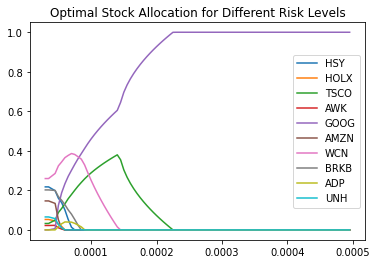

In [42]:
# generating the dataframe for proportions of the portfolio for each risk limit
param_analysis = pd.DataFrame.from_dict(param_analysis, orient='index')
param_analysis.columns = ['HSY', 'HOLX', 'TSCO', 'AWK', 'GOOG', 'AMZN', 'WCN', 'BRKB', 'ADP', 'UNH']
param_analysis.plot()
plt.title('Optimal Stock Allocation for Different Risk Levels')
plt.show()

In [43]:
# subset
risk = list(returns.keys()) # coerce dict_keys to a list
print(risk)
reward = list(returns.values()) # coerce dict_values to a list
print(reward) # we aren't allowed to name our value 'return' - this is a reserved name.

[3e-05, 3.5000000000000004e-05, 4.500000000000001e-05, 5.000000000000001e-05, 5.5000000000000016e-05, 6.000000000000002e-05, 6.500000000000002e-05, 7.000000000000002e-05, 7.500000000000002e-05, 8.000000000000003e-05, 8.500000000000003e-05, 9.000000000000003e-05, 9.500000000000003e-05, 0.00010000000000000005, 0.00010500000000000005, 0.00011000000000000004, 0.00011500000000000004, 0.00012000000000000004, 0.00012500000000000006, 0.00013000000000000007, 0.00013500000000000006, 0.00014000000000000007, 0.00014500000000000008, 0.00015000000000000007, 0.00015500000000000008, 0.00016000000000000007, 0.00016500000000000008, 0.0001700000000000001, 0.00017500000000000008, 0.0001800000000000001, 0.00018500000000000008, 0.0001900000000000001, 0.0001950000000000001, 0.0002000000000000001, 0.0002050000000000001, 0.0002100000000000001, 0.0002150000000000001, 0.00022000000000000012, 0.0002250000000000001, 0.00023000000000000012, 0.00023500000000000013, 0.00024000000000000011, 0.00024500000000000015, 0.0

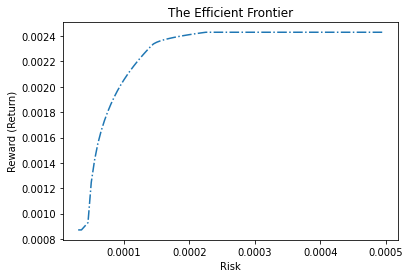

In [44]:
# plot! pylab makes it easy
from pylab import *
plot(risk, reward, '-.')
title('The Efficient Frontier')
xlabel('Risk')
ylabel('Reward (Return)')
plt.show()

The risk level that we chose turns out to give better return(0.18)in 2021. Even though the stocks that we selected didn't perform that great except Google in 2021. Amazon performed poorly whereas WCN took a dip at a certain risk level. So the investors will be able to gain a lot of profit from Google(20% Investment) whereas they might face a miserable loss in amazon.

#Stock Performance
###Let's see how our Stocks performed

Considering first day of each month from Jan 1, 2021 (when we would have done our allocation), Feb 1, 2021 ... through October 1, 2021 (when we imagine we sold our stocks)! 


In [45]:
# Assign the ticker list last time to observe the monthly trend!
tickers_selected = ['AMZN','WCN','GOOG']
# Observing latest data
prices_selected = {ticker : si.get_data(ticker,start_date = '01/01/2021',end_date='10/01/2021',interval='1d') for ticker in tickers_selected}

# let's extract just the data we need (adjclose)
# get the adjclose price for the GOOG (one sample)
final_data = pd.DataFrame(dow_prices['AMZN']['adjclose']).rename(columns = {"adjclose":"AMZN"})

# combine all the tickers (all the rest of the samples)
for i in tickers_selected[1:]:
  final_data[i] = pd.DataFrame(dow_prices[i]['adjclose'])
(final_data)

,AMZN,WCN,GOOG
2021-01-04,3186.629883,100.651115,1728.239990
2021-01-05,3218.510010,101.168343,1740.920044
2021-01-06,3138.379883,102.620567,1735.290039
2021-01-07,3162.159912,103.446144,1787.250000
2021-01-08,3182.699951,104.779015,1807.209961
...,...,...,...
2021-09-24,3425.520020,132.309998,2852.659912
2021-09-27,3405.800049,129.020004,2830.020020
2021-09-28,3315.959961,126.860001,2723.679932
2021-09-29,3301.120117,126.519997,2690.419922


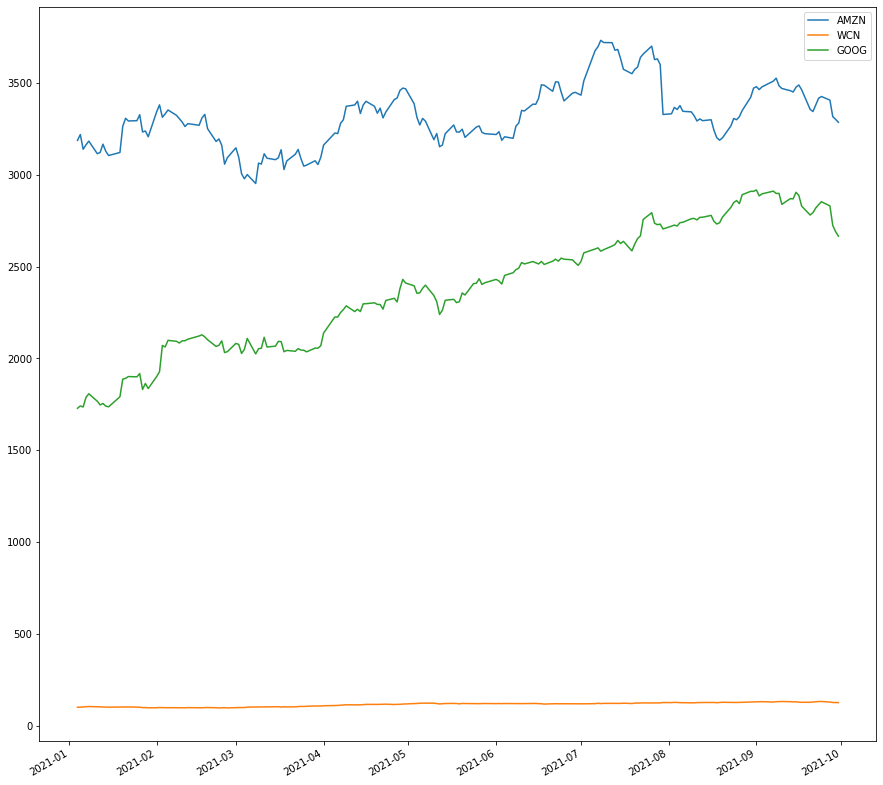

In [46]:
#Let's Plot
final_data.plot(layout=(3,4),
         figsize=(15,15))

plt.show()

##Final Observation

January Closing Price 

- Amazon- 3092.9
- Waste Connections- Inc 97.8
- Google- 1901.3 

October Closing Price 

- Amazon- 3285.0
- Waste Connections- Inc 129.9
- Google- 2916.8

After comparing the January month closing price with October month closing price,there is a 19.5% increase on the investment prescribed by our team plan. This seems a fine investment given such large return in the given time.

#Conclusion

- Portfolio optimization using Python libraries is really beneficial for someone who wants to invest in the stock market with a certain amount of risk and return in mind.

- Based on the historical trends, we can get a fair amount of idea about the trends in the stock and then accordingly we can select the stocks that can give us a good return in the future.

- The standard deviation (i.e. sqrt of variance) can help us measure the volatility of our portfolio and is generally considered a vital statistical tool when it comes to comparing multiple values and their behavior.

- The efficient frontier is a nice visualisation tool for stocks and can be used in real life scenarios while interacting with clients or investors.

- Using the efficient frontier, which is generated through the models, we can choose a particular risk level and based on that we can decide whether to have a diversified portfolio, put all our money into one stock or somewhere in the middle.

- Amazon is a very unstable stock to invest whereas Google and WCN are better stocks to invest as they have a history of upward trend.

- We saw that the chosen stocks in our portfolio turned out to be profitable when tested on the test data (stocks taken between 1st January 2021 and 1st October 2021) and gave a return of approximately 20% in the end which is an amazing return to have.

- The Senator did not help much as most of the stocks in which the Senator had invested were either showing a downward trend or got delisted at a later stage. According to our observation senator will face a major loss if he stayed invested in 'MMM' stock because this is a very unstable stock and he is investing major amount in this particular stock as the future data clearly showed a downward trend in the current years.



##Team Contribution

We divided our project in two teams.

* Aishwary Bodhale : EDA and Background Research for selecting the stocks
* Himanshu Dubey : Modeling,Analysis, and Conclusion
* Karishma Ramchandani : EDA and Background Research for selecting the stocks
* Nandan Adlakha : Modeling,Analysis, and Conclusion
* Rachel Kallely : EDA and Background Research for selecting the stocks
* Sahibpreet Singh :Modeling,Analysis, and Conclusion

#Resources
Senators and Groups (Google spreadsheet)

https://docs.google.com/spreadsheets/d/145RGxwX5VRu6qltDeBgtNEDh0vMbQHH0-bgTg4NHIao/edit?usp=sharing 

Portfolio allocation and Ms. Womack (class example)

https://drive.google.com/file/d/170F2-JtXlrV1iKOLzHFGqtDVTCVzh8Yl/view?usp=sharing 

Downloading real-time stock data from Yahoo Finance API

https://drive.google.com/file/d/1cQxGg7hdXfqMaUyBmYTk8kH9JTTwLLJR/view?usp=sharing 